# 1. BUSINESS UNDERSTANDING
Nowadays, social media is one of ways to understand people's habits. In terms of business, social media is used as a means to recognize its customers, both in terms of customer's habits and responses to business services provided.<br>

There is a twitter dataset that has more than 1 million rows. Company want to know how their customer respons their given services. So that Company asks to classifying their customer's tweets into sentiment class.

# 2. DATA UNDERSTANDING
In this section, we need to load library and install the package needed to do sentiment analysis. Then, we will load the dataset and see the characteristic of the dataset. The dataset for this cases has already saved in csv format named clean_tweet.csv.

### 2.1 Install the package

In [2]:
# package that will use on pre-processing data
!pip install nltk
!pip install textblob
!pip install re
!pip install wordcloud
!pip install tqdm

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 2.2 Import library

In [3]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haniam064181\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.3 Load dataset

In [4]:
#import dataset 
data=pd.read_csv('clean_tweet.csv')
data.head()

text  target
0  awww that s a bummer you shoulda got david car...       0
1  is upset that he can t update his facebook by ...       0
2  i dived many times for the ball managed to sav...       0
3     my whole body feels itchy and like its on fire       0
4  no it s not behaving at all i m mad why am i h...       0

In [5]:
# get info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


Dataset has 2 columns and 1600000 rows.<br>
``text`` column represents tweet.<br>
``target`` column represents sentiment class : 0 for negative and 1 for positive. <br>

# 3. DATA PREPROCESSING 
In this section, we will prepare and preprocess the dataset (to be used on the modelling) such as drop duplicate, removal unused word, and spelling correction.

### 3.1 Drop duplicate

In [6]:
data.drop_duplicates(keep = False, inplace = True)

In [7]:
data.count()

text      1509626
target    1509626
dtype: int64

After drop duplicates, dataset left 1509626 rows. It means that there are 90374 duplicates.

### 3.2 Stopwords removal
Remove stop words that won't give any insight such as in, at, on, and.

In [8]:
%%time
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head(10)

Wall time: 1min 54s


### 3.3 Rare words removal
Remove the words that infrequently shown in data. I choose to show 1000 data.

In [9]:
# find the rare words
rare_word = pd.Series(' '.join(data['text']).split()).value_counts()[-1000:]
rare_word

qidw                         1
heshows                      1
electricitate                1
teht                         1
fianly                       1
halllaaaaaaaaaaaaaaaaaaaa    1
jealose                      1
whizzes                      1
twelevision                  1
powaaaa                      1
applewine                    1
graderrr                     1
natstown                     1
aighttt                      1
broadford                    1
pawb                         1
formentera                   1
emolicious                   1
datenite                     1
sleepypies                   1
woulc                        1
panranga                     1
sambung                      1
waeter                       1
kaadikang                    1
homesiiiick                  1
minggg                       1
listented                    1
arseeeeeeeeeeeeeee           1
seepin                       1
                            ..
amatuer                      1
deezzy  

In [10]:
# removing rare words
rare_word = list(rare_word.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))
data['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 3.4 Spelling correction
Correct spelling in english.

In [11]:
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0           www summer should got david care third day
1    upset update facebook testing might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 3.5 Lemmatization
Reduces the word-forms to linguistically valid lemmas.

In [12]:
%%time
data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['text'].head()

Wall time: 1min 47s


In [13]:
data.head()

text  target
0       awww bummer shoulda got david carr third day       0
1  upset update facebook texting might cry result...       0
2    dived many time ball managed save rest go bound       0
3                    whole body feel itchy like fire       0
4                                   behaving mad see       0

# 4. DATA EXPLORATION
In this section, I will EDA the dataset to get any insight.

### 4.1 Count sentiment class
We want to find which text are often discussed. 

In [14]:
#count sentiment 
sentiment = data.groupby(['target'])['target'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['target']
chart.drop(['target'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

target  tweet_count   percent
0       0       759209  0.502912
1       1       750417  0.497088

From the data above, we can know that data has :
- **Negative** sentiment (target==0) : **50,3%**
- **Positive** sentiment (target==1) : **49,7%**

### 4.2 Visualization of sentiment class
Visualize the sentiment class to see which class has the highest tweets.

#### 4.2.1 Barchart

Text(0.5,1,'Barplot Sentiment Class')

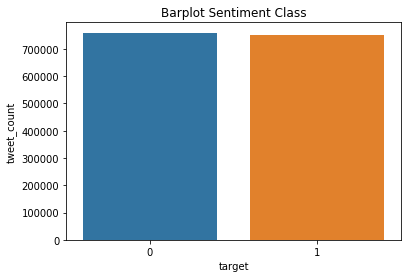

In [15]:
#bar plot visualization 
ax = sns.barplot(x= 'target', y='tweet_count', data=chart)
ax.set_title('Barplot Sentiment Class')

#### 4.2.2 Pie chart

Text(0.5,1,'Pie Chart Sentiment Class')

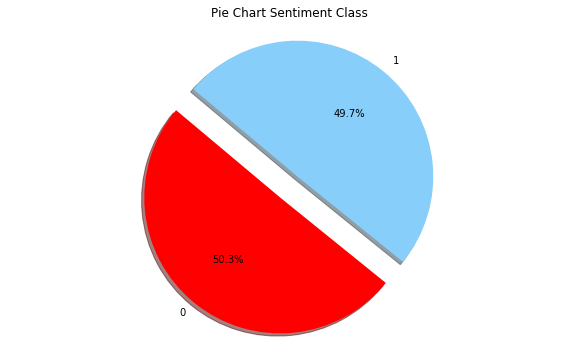

In [16]:
# pie chart visualization
colors = ['red','lightskyblue']
explode = (0.2, 0)  # explode 1st slice
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['target'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart Sentiment Class')

From the above bar chart and pie chart, we can see that :
- **Negative** sentiment (the red one) is the highest sentiment from user (50,3%).
- Negative and positive sentiment class is a little bit different, it has only 0,6% differences.

#### 4.2.3 Wordcloud

In [17]:
#define negative and positive sentiment 
negative = data.loc[data['target'] == 0]
positive  = data.loc[data['target'] == 1]

In [18]:
#merge all the sentiment text comments into one paragraph
all_description_positive = "".join(positive.text.values)
all_description_negative = "".join(negative.text.values)

In [19]:
#make a wordcloud of 200 words
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

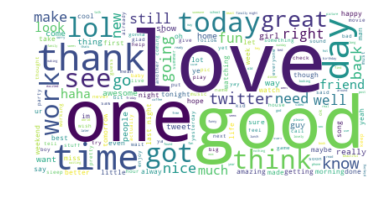

In [20]:
#positve sentiment class
create_word_cloud(all_description_positive)

From the word cloud above, we can know that the words for **positive** sentiment class are love, good, thank, and time.

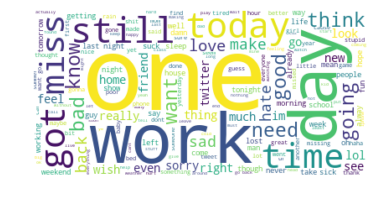

In [21]:
#negative sentiment class
create_word_cloud(all_description_negative)

From the word cloud above, we can know that the words for **negative** sentiment class are room, hotel, front, desk. From those word indicate that the user complains about Hotel's services.

# 5. MODELING
In this section, I will do :
1. Feature extraction use :
   - Count vectorizer (convert text to word count vectors)
   - TF-IDF vectorize (convert text to word frequencies vectors)
2. Modeling development use :
   - Logistic Regression
   - Naive Bayes

### 5.1 Feature Extraction

#### Count Vectorizer 
The output of Count Vectorizer is binary.

In [22]:
count_vectorizer = CountVectorizer(stop_words='english')

#### TF-IDF vectorizer 
TF (term frequency) â€“ IDF (inverse document frequency). The output of TF-IDF is decimal.

In [23]:
tfidf = TfidfVectorizer(stop_words='english' )

### 5.2 Train Test Split
Split data into train and test

In [25]:
X = data['text']
y = data['target']

In [26]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [28]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.3, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.3, random_state=0)

### 5.3 Model Machine Learning

I will use 2 algorithms :
1. Logistic Regression
2. Naive Bayes

#### 5.3.1 Logistic Regression

In [30]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

In [31]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

#### 5.3.1 Naive Bayes

In [33]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [34]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

### 5.4 Model Evaluation

The following options are kind of model evaluation that used :
- Accuracy = (TP + TN) / (P + N)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F-measure = 2TP / (2TP + FP + FN)

#### 5.3.1 Logistic Regression

In [36]:
# using count vectorizer
print("______________ Countvectorizer ______________")
Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 80.04% & 76.46%
Precision train & test  : 80.04% & 76.46%
F1 Score train & test   : 80.04% & 76.46%


In [37]:
# using count vectorizer
print("______________ TF-IDF ______________")

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_tfidf_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 79.13% & 76.64%
Precision train & test  : 79.13% & 76.64%
F1 Score train & test   : 79.13% & 76.64%


#### 5.3.2 Naive Bayes

In [39]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 78.82% & 75.60%
Precision train & test  : 78.82% & 75.60%
F1 Score train & test   : 78.82% & 75.60%


In [40]:
# using count vectorizer
print("______________ TF-IDF ______________")

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_tfidf_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 78.86% & 74.91%
Precision train & test  : 78.86% & 74.91%
F1 Score train & test   : 78.86% & 74.91%


# 6. EVALUATION

From the result of social media analysis above, we can know that :
1. Dataset has **negative sentiment class 50,3%** and **positive sentiment class 49,7%**.
2. The most frequent words for **negative** sentiment class are **room, hotel, front, desk**. It indicates that user complains about Hotel's service.
3. The most frequent words for **positive** sentiment class are **love, good, thank, and time**.
4. Model Machine Learning
    1. **Logistic Regression** :
        - Countvectorizer : all values of recall, precision, and F-score for train and test are 80.04% & 76.46%.
        - TF-IDF : all values of recall, precision, and F-score for train and test are 79.13% & 76.64%.
        - We can conclude that for this dataset and algorithm, **TF-IDF is better** than Countvectorizer because of the difference between train and test are 2,49% (less than Countvectorizer has 3,58%).
    
    2. **Naive Bayes** :
       - Countvectorizer : all values of recall, precision, and F-score for train and test are 78.82% & 75.60%.
       - TF-IDF : all values of recall, precision, and F-score for train and test are 78.86% & 74.91%.
       - We can conclude that for this dataset and algorithm, **Countvectorizer is better** than TF-IDF because of the difference between train and test are 3,22% (less than TF-IDF has 3,95%).
       
<br>
Insight for business:
1. Improve the services given, because the negative sentiment mostly mentions about room, hotel, and front desk.
2. Give thanks to customers, can be in a greeting card or via email. It will make customers feel valued.